# <font color = 'A5FF90'>**Latar Belakang**</font>

**Amazon Web Services, Inc (AWS)**, sebuah perusahaan yang bergerak di bidang *Cloud Computing*, menjual beragam ***Software as a Service* (SaaS)** kepada pelanggan dari berbagai industri dan wilayah. Dalam konteks ini, tim *data analyst* AWS memainkan peran penting dalam menganalisis data penjualan SaaS mereka, dengan tujuan memahami faktor-faktor yang mempengaruhi profitabilitas produk SaaS. Dalam analisis ini, terdapat sejumlah transaksi yang mencatatkan profit negatif, dan tujuan utamanya adalah untuk mengidentifikasi variabel-variabel yang mungkin memengaruhi profitabilitas negatif. Dengan demikian, analisis ini diharapkan dapat memberikan wawasan yang diperlukan untuk meningkatkan profitabilitas produk tersebut dan menyesuaikan strategi bisnis yang diterapkan sesuai dengan kebutuhan pasar dan pelanggan.

# <font color = 'A5FF90'>**Rumusan Masalah**</font>

Perusahaan ingin memahami **faktor-faktor yang berkontribusi pada profitabilitas negatif dalam penjualan produk SaaS di AWS, terutama dalam konteks produk yang menghasilkan profit negatif**. Tujuan analisis ini adalah untuk mengidentifikasi variabel-variabel yang mungkin memengaruhi profitabilitas negatif dan memberikan rekomendasi untuk meningkatkan profitabilitas produk tersebut serta menyesuaikan strategi bisnis yang diterapkan. Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**"Bagaimana menganalisis faktor-faktor yang berkontribusi pada profitabilitas negatif dalam penjualan produk SaaS di AWS dan memberikan rekomendasi untuk meningkatkan profitabilitas produk tersebut?"**

# <font color = 'A5FF90'>**Metodologi Pengerjaan**</font>

Adapun metodologi pengerjaan yang disusun menjadi 3 (tiga) tahapan demi memberikan penjelasan secara detail mengenai analisis yang dilakukan dengan urutannya sebagai berikut:
1. <font color = '9EFFFF'>**Data Understanding**</font>
2. <font color = '9EFFFF'>**Data Cleaning & Preparation**</font><tab>
3. <font color = '9EFFFF'>**Data Analysis**</font><tab>

Hal pertama yang perlu dilakukan sebelum memulai pengerjaan yaitu meng-*import* modul atau *library* yang dibutuhkan.

In [1782]:
from scipy.stats import normaltest

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## <font color = '9EFFFF'>**Data Understanding**</font>

Sebelum masuk ke dalam tahap analisis, kita perlu mengenali *dataset* terlebih dahulu pada tahapan *data understanding*. Dari proses ini, kita akan mengetahui anomali apa saja yang terdapat pada *dataset*, sehingga kita akan dengan mudah untuk menanganinya pada tahapan *data cleaning*.

### <font color = 'FF7200'>**1. Dataset**</font>

Untuk menjawab rumusan masalah di atas, kita akan menganalisa data penjualan SaaS yang telah dikumpulkan oleh perusahaan AWS, yang mana *dataset* tersebut dapat diakses pada link [ini](https://www.google.com/url?q=https://ee-assets-prod-us-east-1.s3.amazonaws.com/modules/337d5d05acc64a6fa37bcba6b921071c/v1/SaaS-Sales.csv&sa=D&source=apps-viewer-frontend&ust=1697627816327121&usg=AOvVaw1JS9olOuVslYP4FLeDHoR1&hl=en-GB). Berikut adalah 5 baris teratas dan terbawah dari *dataset* tersebut:

In [1783]:
df = pd.read_csv("SaaS-Sales.csv")
display(df.head(), df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


*Dataset* SaaS-Sales berisi data transaksi dari perusahaan AWS yang menjual serta memasarkan SaaS ke perusahaan lain atau Business-to-business (B2B). Dalam *dataset* tersebut, setiap baris mewakili satu transaksi atau pesanan (9.994 transaksi), serta terdapat 19 kolom yang meliputi:

* `Row ID`       : ID unik untuk setiap baris.
* `Order ID`     : ID unik untuk setiap transaksi.
* `Order Date`   : Tanggal dilakukannya pesanan.
* `Date Key`     : Representasi numerik dari tanggal pemesanan (YYYYMMDD).
* `Contact Name` : Orang yang mewakili perusahaan dalam melakukan pemesanan.
* `Country`      : Negara asal perusahaan.
* `City`         : Kota asal perusahaan.
* `Region`       : Region asal perusahaan.
* `Subregion`    : Subregion asal perusahaan.
* `Customer`     : Perusahan yang melakukan pemesanan.
* `Customer ID`  : ID unik untuk setiap perusahaan.
* `Industry`     : Sektor ekonomi dari perusahaan.
* `Segment`      : Segment bisnis dari perusahaan.
* `Product`      : Produk yang dipesan.
* `License`      : *License key* dari produk.
* `Sales`        : Total penjualan untuk setiap transaksi.
* `Quantity`     : Total item dalam transaksi.
* `Discount`     : Diskon yang diterapkan pada transaksi.
* `Profit`       : Keuntungan dari transaksi.

### <font color = 'FF7200'>**2. Informations**</font>

In [1784]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Dari *output* di atas, kita bisa mengetahui bahwasanya *dataset* SaaS-Sales mengandung 9994 baris dan 19 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda yang di antaranya terdiri dari:
- `float` terdapat pada kolom `Sales`, `Discount`, dan `Profit`.
- `int` terdapat pada kolom `Row ID`, `Date Key`, `Customer ID`, dan `Quantity`.
- `object` terdapat pada kolom `Order ID`, `Order Date`, `Contact Name`, `Country`, `City`, `Region`, `Subregion`, `Customer`, `Industry`, `Segment`, `Product`, dan `License`.

Merujuk pada informasi tipe data di atas, kolom `Order Date` memiliki tipe data yang salah atau tidak sesuai dengan data yang dimiliki oleh kolom tersebut, sehingga perlu dilakukan perubahan tipe data yang akan diproses pada tahapan *data cleaning*. Selain itu, informasi di atas juga cukup menjelaskan bahwasanya *dataset* SaaS-Sales tidak memiliki *missing values* di setiap kolomnya. Pemaparan lebih detail terkait *missing values* akan dijelaskan pada tahapan *data cleaning & preparation*.

### <font color = 'FF7200'>**3. Descriptive Statistics**</font>

Berikut adalah rangkuman yang menggambarkan secara komprehensif terkait *dataset* SaaS-Sales tanpa melakukan pengujian hipotesis. Proses ini membantu kita dalam menyajikan data dengan jelas dan membuat kesimpulan awal tentang karakteristik data yang diamati, baik itu data yang terdapat pada kolom kategorikal ataupun numerikal.

In [1785]:
display(df.describe(), df.describe(include = "object"))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


### <font color = 'FF7200'>**4. Unique Values**</font>

In [1786]:
pd.set_option("display.max_colwidth", 1)

list_item = []
for col in df.columns:
    list_item.append([col, df[col].nunique(), df[col].unique()])

tabel_unique = pd.DataFrame(columns = ["Column Name", "Number of Unique", "Unique Sample"], data = list_item)
tabel_unique

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

Secara umum, kita bisa menarik kesimpulan bahwa:
- Kolom `Row ID`, `Order ID`, dan `Customer ID` masing-masing berisi ID unik untuk setiap baris, transaksi, serta perusahaan. Ketiga kolom tersebut sangat tidak relevan untuk dianalisa, sehingga dapat dihapus atau tidak diikutsertakan ke dalam tahap analisis.
- Kolom `Date Key` dapat dikatakan sebagai kolom duplikat dikarenakan kolom ini berisi representasi numerik dari kolom `Order Date`. Hal tersebut dapat membingungkan kita dalam menganalisis tanggal transaksi, sehingga kita perlu untuk menghapusnya.
- Kolom `Contact Name` berisi nama orang-orang yang mewakilkan perusahaan dalam melakukan transaksi. Untuk mempermudah proses analisis *dataset*, kita hanya membutuhkan kolom `Customer` sebagai acuan pembeli dari produk-produk SaaS, sehingga kolom `Contact Name` dapat dihapus juga.
- Kolom `License` memiliki karakteristik data yang hampir mirip dengan kolom `Row ID`, `Order ID`, serta `Customer ID`. Data tersebut memiliki nilai unik yang jumlahnya sama percis dengan jumlah keseluruhan data pada *dataset* SaaS-Sales, sehingga perlu untuk dihilangkan.
- Kolom `Subregion` pun memiliki karakteristik data yang sama dengan kolom `Region` di karenakan kedua kolom tersebut masing-masing berisi *Business Region Acronyms*. Salah satu dari kolom tersebut harus dihapus agar tidak menimbulkan kebingungan saat proses analisis berlangsung, sehingga di sini kita memutuskan akan menghapus kolom `Subregion` agar proses analisis mengacu pada *Business Region Acronyms* dari kolom `Region` saja.

## <font color = '9EFFFF'>**Data Cleaning & Preparation**</font>

Tahap ini bertujuan untuk mengidentifikasi dan mengoreksi atau membuang data anomali dari *dataset*. Data yang diperbaiki atau dibersihkan bisa berupa data yang inkonsisten, tidak akurat, duplikat, salah format, atau hal-hal lain yang dapat mengganggu proses analisis, seperti kolom-kolom yang tidak akan dianalisa. Dalam tahap ini, setiap penanganan anomali yang dilakukan akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

### <font color = 'FF7200'>**1. Changing Data Type**</font>

Seperti yang telah kita ketahui pada tahapan *data understanding*, kolom `Order Date` memiliki tipe data yang salah atau tidak sesuai dengan data yang dimiliki oleh kolom tersebut, sehingga perlu dilakukan perubahan tipe data terlebih dahulu.

In [1787]:
df["Order Date"] = df["Order Date"].apply(pd.to_datetime)
tipe_data_order_date = df["Order Date"].dtypes

df.info()
display(df["Order Date"].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

0   2022-11-09
1   2022-11-09
2   2022-06-13
3   2021-10-11
4   2021-10-11
Name: Order Date, dtype: datetime64[ns]

### <font color = 'FF7200'>**2. Displays Missing Values**</font>

In [1788]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

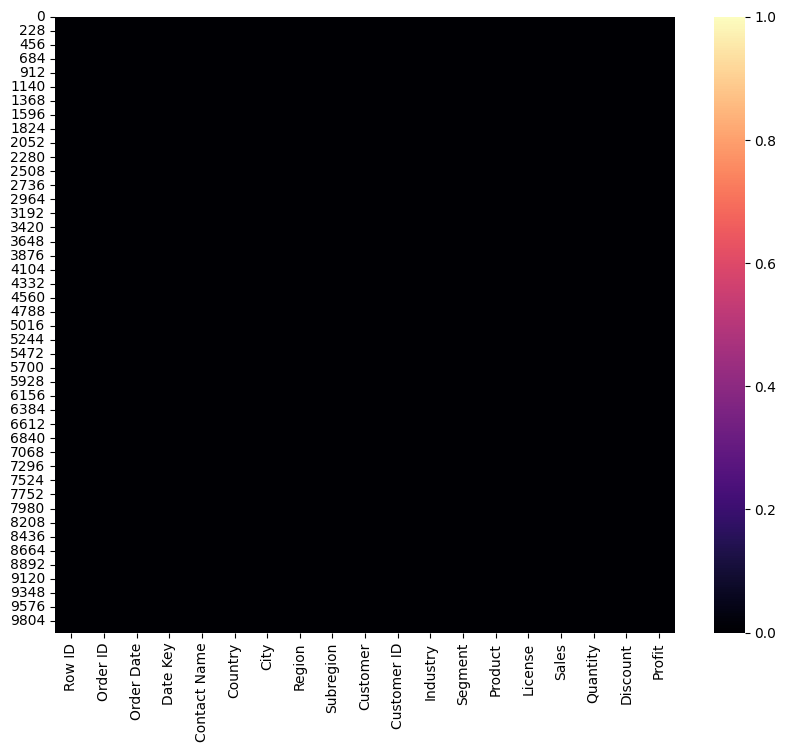

In [1789]:
plt.figure(figsize = (10, 8))
sns.heatmap(data = df.isna(), vmin = 0, vmax = 1, cmap = "magma")
plt.show()

Secara garis besar, *dataset* SaaS-Sales tidak memiliki *missing values* di setiap kolomnya, sehingga tidak perlu dilakukan penanganan *missing values* terhadap *dataset* ini. Hal tersebut dapat terlihat sangat jelas ketika menampilkan kedua *output* di atas yang menunjukkan angka 0 (nol) di setiap kolomnya, serta pada *heatmap* yang secara keseluruhan terlihat hitam di setiap baris dan kolomnya dan tidak terdapat garis putih yang menandakan adanya *missing values*.

### <font color = 'FF7200'>**3. Displays Duplicated Values**</font>

In [1790]:
duplikat = df.duplicated().sum()
display(df[df.duplicated()])
print(f"\x1B[3mDataset\x1B[0m SaaS-Sales mengandung data duplikat sebanyak {duplikat} (nol) data.")

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


Dataset SaaS-Sales mengandung data duplikat sebanyak 0 (nol) data.


Setelah dilakukan pengecekan, ternyata *dataset* SaaS-Sales ini tidak mengandung data duplikat, sehingga tidak perlu dilakukan penanganan terhadap data duplikat.

### <font color = 'FF7200'>**4. Rearrange and Drop Unimportant Columns**</font>

Merujuk pada penjelasan ketika menampilkan *unique values*, terdapat beberapa kolom yang harus dihapus atau dihilangkan agar tujuan analisa lebih terstruktur. Kolom-kolom tersebut di antaranya yaitu `Row ID`, `Order ID`, `Date Key`, `Contact Name`, `Subregion`, `Customer ID`, serta `License`. Selain itu, agar tampilan *dataset* lebih mudah untuk dipahami, kita perlu menyusun kolom lainnya dengan membagi ke dalam 5 bagian secara berurutan, yang mana urutannya disusun sebagai berikut:
1. **Tanggal dilakukannya pemesanan** yang terdiri dari kolom `Order Date`.
2. ***Customer* (perusahaan) beserta atribut bisnisnya** yang terdiri dari kolom `Customer`, `Industry`, dan `Segment`.
3. **Tempat atau asal *customer* (perusahaan) berdiri** yang terdiri dari kolom `City`, `Country`, dan `Region`.
4. **Produk serta total item dalam transaksi** yang terdiri dari kolom `Product` dan `Quantity`.
5. **Profit dan Harga jual beserta total diskonnya** yang terdiri dari kolom `Sales`, `Discount`, dan `Profit`.

In [1791]:
df = df[["Order Date", "Customer", "Industry", "Segment", "City", "Country", "Region", "Product", "Quantity", "Sales", "Discount", "Profit"]]
display(df.head(), df.tail())

,Order Date,Customer,Industry,Segment,City,Country,Region,Product,Quantity,Sales,Discount,Profit
0,2022-11-09,Chevron,Energy,SMB,Dublin,Ireland,EMEA,Marketing Suite,2,261.9600,0.00,41.9136
1,2022-11-09,Chevron,Energy,SMB,Dublin,Ireland,EMEA,FinanceHub,3,731.9400,0.00,219.5820
2,2022-06-13,Phillips 66,Energy,Strategic,New York City,United States,AMER,FinanceHub,2,14.6200,0.00,6.8714
3,2021-10-11,Royal Dutch Shell,Energy,SMB,Stuttgart,Germany,EMEA,ContactMatcher,5,957.5775,0.45,-383.0310
4,2021-10-11,Royal Dutch Shell,Energy,SMB,Stuttgart,Germany,EMEA,Marketing Suite - Gold,2,22.3680,0.20,2.5164


,Order Date,Customer,Industry,Segment,City,Country,Region,Product,Quantity,Sales,Discount,Profit
9989,2020-01-22,Johnson & Johnson,Healthcare,SMB,Hamburg,Germany,EMEA,SaaS Connector Pack,3,25.248,0.2,4.1028
9990,2023-02-27,American Express,Finance,SMB,Milwaukee,United States,AMER,SaaS Connector Pack,2,91.960,0.0,15.6332
9991,2023-02-27,American Express,Finance,SMB,Milwaukee,United States,AMER,Site Analytics,2,258.576,0.2,19.3932
9992,2023-02-27,American Express,Finance,SMB,Milwaukee,United States,AMER,Support,4,29.600,0.0,13.3200
9993,2023-05-05,Comcast,Communications,SMB,Dallas,United States,AMER,OneView,2,243.160,0.0,72.9480


Setelah melakukan proses *data cleaning & preparation*, sekarang mari kita lihat sekilas terlebih dahulu informasi dari *dataset* SaaS-Sales yang telah kita bersihkan.

In [1792]:
pd.set_option("display.max_colwidth", 1)
num_rows = df.shape[0]
num_columns = df.shape[1]

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(), list(df[col].drop_duplicates().sample(3).values)])

tabel_unique = pd.DataFrame(columns = ["Data Features", "Data Type", "Null Values", "Number of Unique", "Unique Sample (3)"], data = list_item)
display(tabel_unique)
print(f"Sekarang, \x1B[3mdataset\x1B[0m SaaS-Sales terdiri dari {num_rows} baris dan {num_columns} kolom setelah melalui proses \x1B[3mdata cleaning & preparation\x1B[0m.")

,Data Features,Data Type,Null Values,Number of Unique,Unique Sample (3)
0,Order Date,datetime64[ns],0,1237,"[2020-11-02T00:00:00.000000000, 2020-05-23T00:00:00.000000000, 2020-05-11T00:00:00.000000000]"
1,Customer,object,0,99,"[Allstate, Anthem, McKesson]"
2,Industry,object,0,10,"[Manufacturing, Finance, Communications]"
3,Segment,object,0,3,"[Strategic, SMB, Enterprise]"
4,City,object,0,262,"[Alexandria, Nashville, Ottawa]"
5,Country,object,0,48,"[Netherlands, Saudi Arabia, Turkey]"
6,Region,object,0,3,"[EMEA, AMER, APJ]"
7,Product,object,0,14,"[ContactMatcher, Big Ol Database, FinanceHub]"
8,Quantity,int64,0,14,"[6, 11, 5]"
9,Sales,float64,0,5825,"[63.488, 896.99, 62.1]"


Sekarang, dataset SaaS-Sales terdiri dari 9994 baris dan 12 kolom setelah melalui proses data cleaning & preparation.


Untuk merangkum keseluruhan proses pada *data cleaning & preparation*, kita bisa melihat bahwa:
- Tipe data pada kolom `Order Date` berhasil diubah menjadi `datetime`.
- Setiap baris pada *dataset* ini tidak memiliki *missing values* dan juga data duplikat, sehingga jumlah baris atau data yang ada tidak berubah, yaitu tetap berisi 9994 baris.
- Terjadi perubahan pada jumlah kolom yang mulanya berjumlah 19 kolom kini hanya berjumlah 12 kolom di karenakan kita hanya akan menganalisa data-data yang terdapat pada ke-12 kolom tersebut.

## <font color = '9EFFFF'>**Data Analysis**</font>

Setelah kita melalui tahapan _data cleaning & preparation_, sekarang kita bisa memulai analisis untuk mencari tahu **faktor-faktor yang berkontribusi pada profitabilitas negatif suatu produk SaaS**. 

### <font color = 'FF7200'>**1. Produk apa saja yang memiliki profitabilitas negatif?**</font>

Analisis pertama yang harus dilakukan yaitu dengan mencari tahu produk-produk yang memiliki profit keseluruhannya negatif atau rugi. Pada proses ini, kita perlu menampilkan total profit keseluruhan dari setiap produk SaaS yang dijual oleh AWS ke dalam bentuk *bar chart*. Setelah mengetahui produknya, kita dapat menganalisa lebih dalam terkait faktor-faktor apa saja yang menyebabkan produk tersebut rugi.

In [1793]:
df.groupby("Product")[["Profit"]].sum().sort_values("Profit", ascending = False)

,Profit
Product,
Alchemy,55617.8249
Site Analytics,44515.7306
Data Smasher,41936.6357
Support,32864.4698
FinanceHub,32136.4203
Marketing Suite - Gold,21278.8264
OneView,18138.0054
SaaS Connector Pack,13059.1436
ContactMatcher,12496.2822


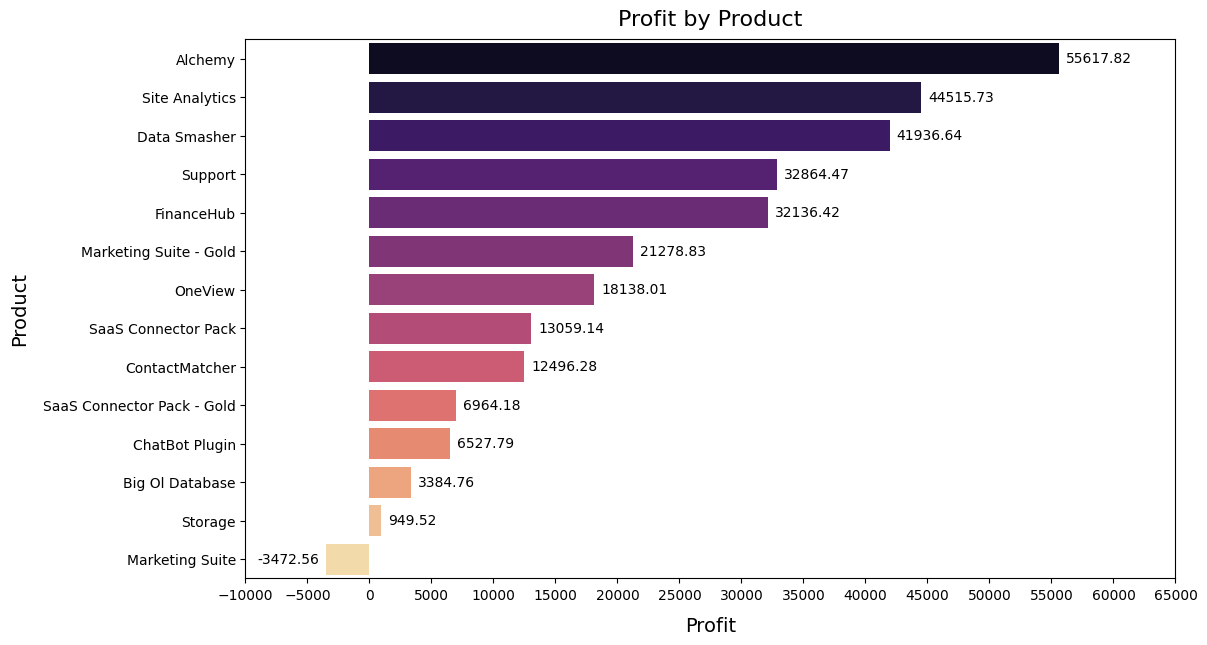

In [1794]:
plt.figure(figsize = (12, 7))
ax = sns.barplot(data = df,
                 y = "Product",
                 x = "Profit",
                 ci = 0,
                 palette = "magma",
                 estimator = "sum",
                 order = df.groupby("Product")[["Profit"]].sum().sort_values("Profit", ascending = False).index
     )
container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], padding = 5)
plt.title("Profit by Product", size = 16, pad = 10)
plt.xlabel("Profit", size = 14, labelpad = 10)
plt.ylabel("Product", size = 14, labelpad = 10)
plt.xticks(range(-10000, 65001, 5000))
plt.show()

Berdasarkan diagram di atas, dari ke-14 produk yang dijual, ternyata hanya ada 1 (satu) produk SaaS yang memiliki profit keseluruhannya minus atau rugi, dan nama produk tersebut ialah `Marketing Suite` dengan total profit keseluruhannya sebesar -$3.472,56. Dari diagram di atas pun kita bisa mengetahui bahwasanya produk `Alchemy` memiliki profit keseluruhan tertinggi jika dibandingkan dengan produk lainnya, yaitu sebesar $55.617,82.

Langkah pertama dalam menganalisa produk `Marketing Suite` adalah dengan memfilter *dataset* SaaS-Sales berdasarkan produk tersebut. Kita juga perlu menambahkan kolom baru dengan nama `Order Month` untuk menampilkan tren penjualan, profit, serta diskon seiring berjalannya waktu, dalam kasus ini kita akan menampilkan tren tersebut berdasarkan bulan. Selain itu, kita juga membutuhkan nilai margin keuntungan yang akan dimasukkan ke dalam kolom `Profit Margin` untuk mengetahui nilai keuntungan bersih (%) dari setiap transaksi.

In [1795]:
df_msuite = df[df["Product"] == "Marketing Suite"]
df_msuite = df_msuite[["Order Date", "Customer", "Quantity", "Sales", "Discount", "Profit"]]
df_msuite["Order Month"] = df_msuite["Order Date"].apply(lambda x : str(x)[:7])
df_msuite["Order Month"] = df_msuite["Order Month"].apply(pd.to_datetime)
df_msuite["Profit Margin"] = round((df_msuite["Profit"] / df_msuite["Sales"]) * 100, 2)
display(df_msuite.head(), df_msuite.tail())

,Order Date,Customer,Quantity,Sales,Discount,Profit,Order Month,Profit Margin
0,2022-11-09,Chevron,2,261.9600,0.00,41.9136,2022-11-01,16.00
27,2021-09-17,Intel,7,3083.4300,0.50,-1665.0522,2021-09-01,-54.00
38,2021-12-27,Banco Santander,3,532.3992,0.32,-46.9764,2021-12-01,-8.82
189,2021-10-12,HonHai Precision Industry,4,899.1360,0.20,112.3920,2021-10-01,12.50
192,2021-10-12,HonHai Precision Industry,3,626.3520,0.20,46.9764,2021-10-01,7.50


,Order Date,Customer,Quantity,Sales,Discount,Profit,Order Month,Profit Margin
9741,2021-11-08,Samsung Electronics,5,4404.9000,0.00,1013.1270,2021-11-01,23.00
9769,2022-11-25,Valero Energy,5,339.9200,0.20,8.4980,2022-11-01,2.50
9787,2023-03-28,UnitedHealth Group,5,1023.3320,0.32,-30.0980,2023-03-01,-2.94
9931,2021-11-13,Amazon,4,683.3320,0.15,-40.1960,2021-11-01,-5.88
9962,2021-03-19,News Corp.,4,383.4656,0.32,-67.6704,2021-03-01,-17.65


Sebelum memasuki proses analisis lebih dalam, kita perlu memeriksa terlebih dahulu distribusi data pada kolom-kolom numerikal yang akan digunakan dalam proses analisis, yang di antaranya yaitu kolom `Sales`, `Discount`, `Profit`, dan `Profit Margin`.

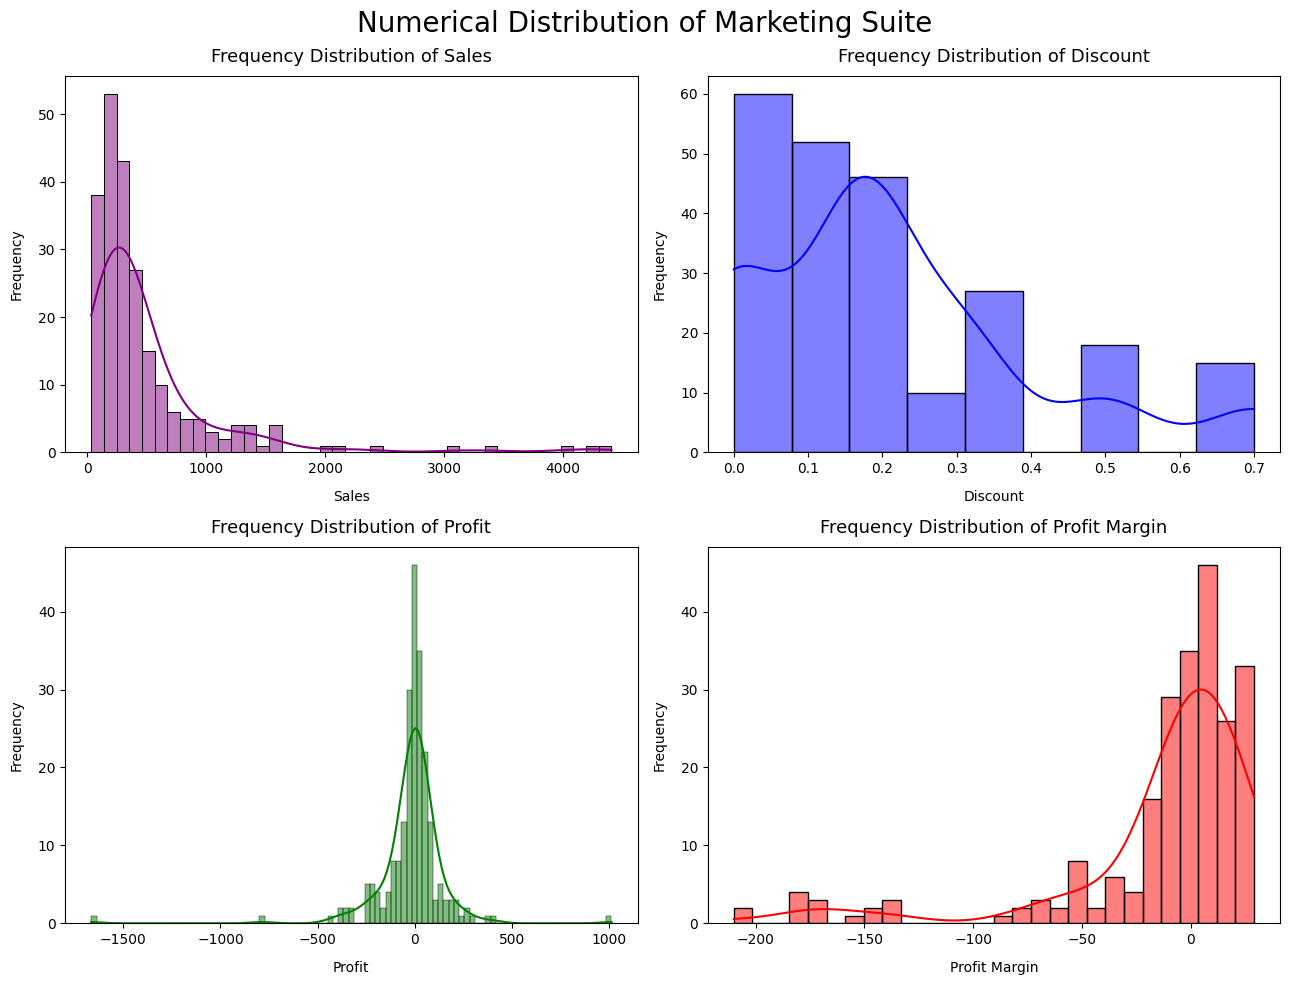

In [1796]:
numerical_col = ["Sales", "Discount", "Profit", "Profit Margin"]
hist_color = ["purple", "blue", "green", "red"]

plt.figure(figsize = (13, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data = df_msuite,
                x = numerical_col[i],
                kde = True,
                color = hist_color[i]
    )
    plt.title(f"Frequency Distribution of {numerical_col[i]}", size = 13, pad = 10)
    plt.xlabel(numerical_col[i], size = 10, labelpad = 10)
    plt.ylabel("Frequency", size = 10, labelpad = 10)

plt.suptitle("Numerical Distribution of Marketing Suite", size = 20)
plt.tight_layout()
plt.show()

Berdasarkan gambar di atas, semua kolom numerikal yang divisualisasikan menggunakan *histogram* memiliki distribusi data yang tidak normal. Terlihat sangat jelas bahwa kolom `Sales` dan `Discount` memiliki distribusi *`left-skewed`* atau *`negative skew`*, sedangkan untuk kolom `Profit` dan `Profit Margin` memiliki distribusi *`right-skewed`* atau *`positive skew`*. Hal itu dapat dibuktikan juga dengan uji normalitas pada ke-4 kolom tersebut bahwa data-data yang ada tidak terdistribusi secara normal.

In [1797]:
numerical_col = ["Sales", "Discount", "Profit", "Profit Margin"]

for i in range(len(numerical_col)):
    stat, pvalue = normaltest(df_msuite[numerical_col[i]])    
    if pvalue > 0.05:
        print(f"pvalue = {pvalue:.5f}, kita mengasumsikan bahwa data pada kolom '{numerical_col[i]}' terdistribusi normal")
    else:
        print(f"pvalue = {pvalue:.5f}, kita mengasumsikan bahwa data pada kolom '{numerical_col[i]}' TIDAK terdistribusi normal")

pvalue = 0.00000, kita mengasumsikan bahwa data pada kolom 'Sales' TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan bahwa data pada kolom 'Discount' TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan bahwa data pada kolom 'Profit' TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan bahwa data pada kolom 'Profit Margin' TIDAK terdistribusi normal


### <font color = 'FF7200'>**2. Apakah ada kenaikan atau penurunan yang mencolok dalam kinerja produk "Marketing Suite" selama periode waktu tertentu? Kemudian apakah ada hubungan antara harga penjualan dengan diskon yang diterapkan?**</font>

Setelah kita mengetahui bahwa semua data pada kolom `Sales`, `Discount`, `Profit`, dan `Profit Margin` tidak terdistribusi normal, artinya kita perlu menggunakan *aggregate function* `median` untuk mengurangi dampak *outlier* dan fluktuasi bulanan saat menampilkan tren penjualan, profit, diskon, serta margin keuntungan seperti yang telah kita rencanakan sebelumnya. Berikut adalah data-data yang akan kita gunakan untuk menampilkan semua tren berdasarkan bulan:

#### **`Data untuk tren penjualan (Sales)`**

In [1798]:
df_msuite_sales = df_msuite.groupby("Order Month")[["Sales"]].median().reset_index()
display(df_msuite_sales.head(), df_msuite_sales.tail())

,Order Month,Sales
0,2020-01-01,161.7150
1,2020-02-01,290.6660
2,2020-03-01,302.4500
3,2020-04-01,308.4990
4,2020-05-01,320.3155


,Order Month,Sales
42,2023-08-01,145.7400
43,2023-09-01,241.9600
44,2023-10-01,314.3520
45,2023-11-01,324.6504
46,2023-12-01,206.4820


#### **`Data untuk tren keuntungan (Profit)`**

In [1799]:
df_msuite_profit = df_msuite.groupby("Order Month")[["Profit"]].median().reset_index()
display(df_msuite_profit.head(), df_msuite_profit.tail())

,Order Month,Profit
0,2020-01-01,-24.67810
1,2020-02-01,3.41960
2,2020-03-01,-12.09800
3,2020-04-01,-18.14700
4,2020-05-01,-94.81075


,Order Month,Profit
42,2023-08-01,-36.6744
43,2023-09-01,14.0980
44,2023-10-01,-14.4784
45,2023-11-01,-26.2801
46,2023-12-01,9.6585


#### **`Data untuk tren margin keuntungan (Profit Margin)`**

In [1800]:
df_msuite_profit_margin = df_msuite.groupby("Order Month")[["Profit Margin"]].median().reset_index()
display(df_msuite_profit_margin.head(), df_msuite_profit_margin.tail())

,Order Month,Profit Margin
0,2020-01-01,-42.410
1,2020-02-01,1.180
2,2020-03-01,-5.880
3,2020-04-01,-5.880
4,2020-05-01,-26.295


,Order Month,Profit Margin
42,2023-08-01,-20.000
43,2023-09-01,5.880
44,2023-10-01,-4.710
45,2023-11-01,-9.745
46,2023-12-01,2.500


#### **`Data untuk tren diskon (Discount)`**

In [1801]:
df_msuite_discount = df_msuite.groupby("Order Month")[["Discount"]].median().reset_index()
display(df_msuite_discount.head(), df_msuite_discount.tail())

,Order Month,Discount
0,2020-01-01,0.325
1,2020-02-01,0.150
2,2020-03-01,0.150
3,2020-04-01,0.150
4,2020-05-01,0.325


,Order Month,Discount
42,2023-08-01,0.300
43,2023-09-01,0.150
44,2023-10-01,0.150
45,2023-11-01,0.200
46,2023-12-01,0.175


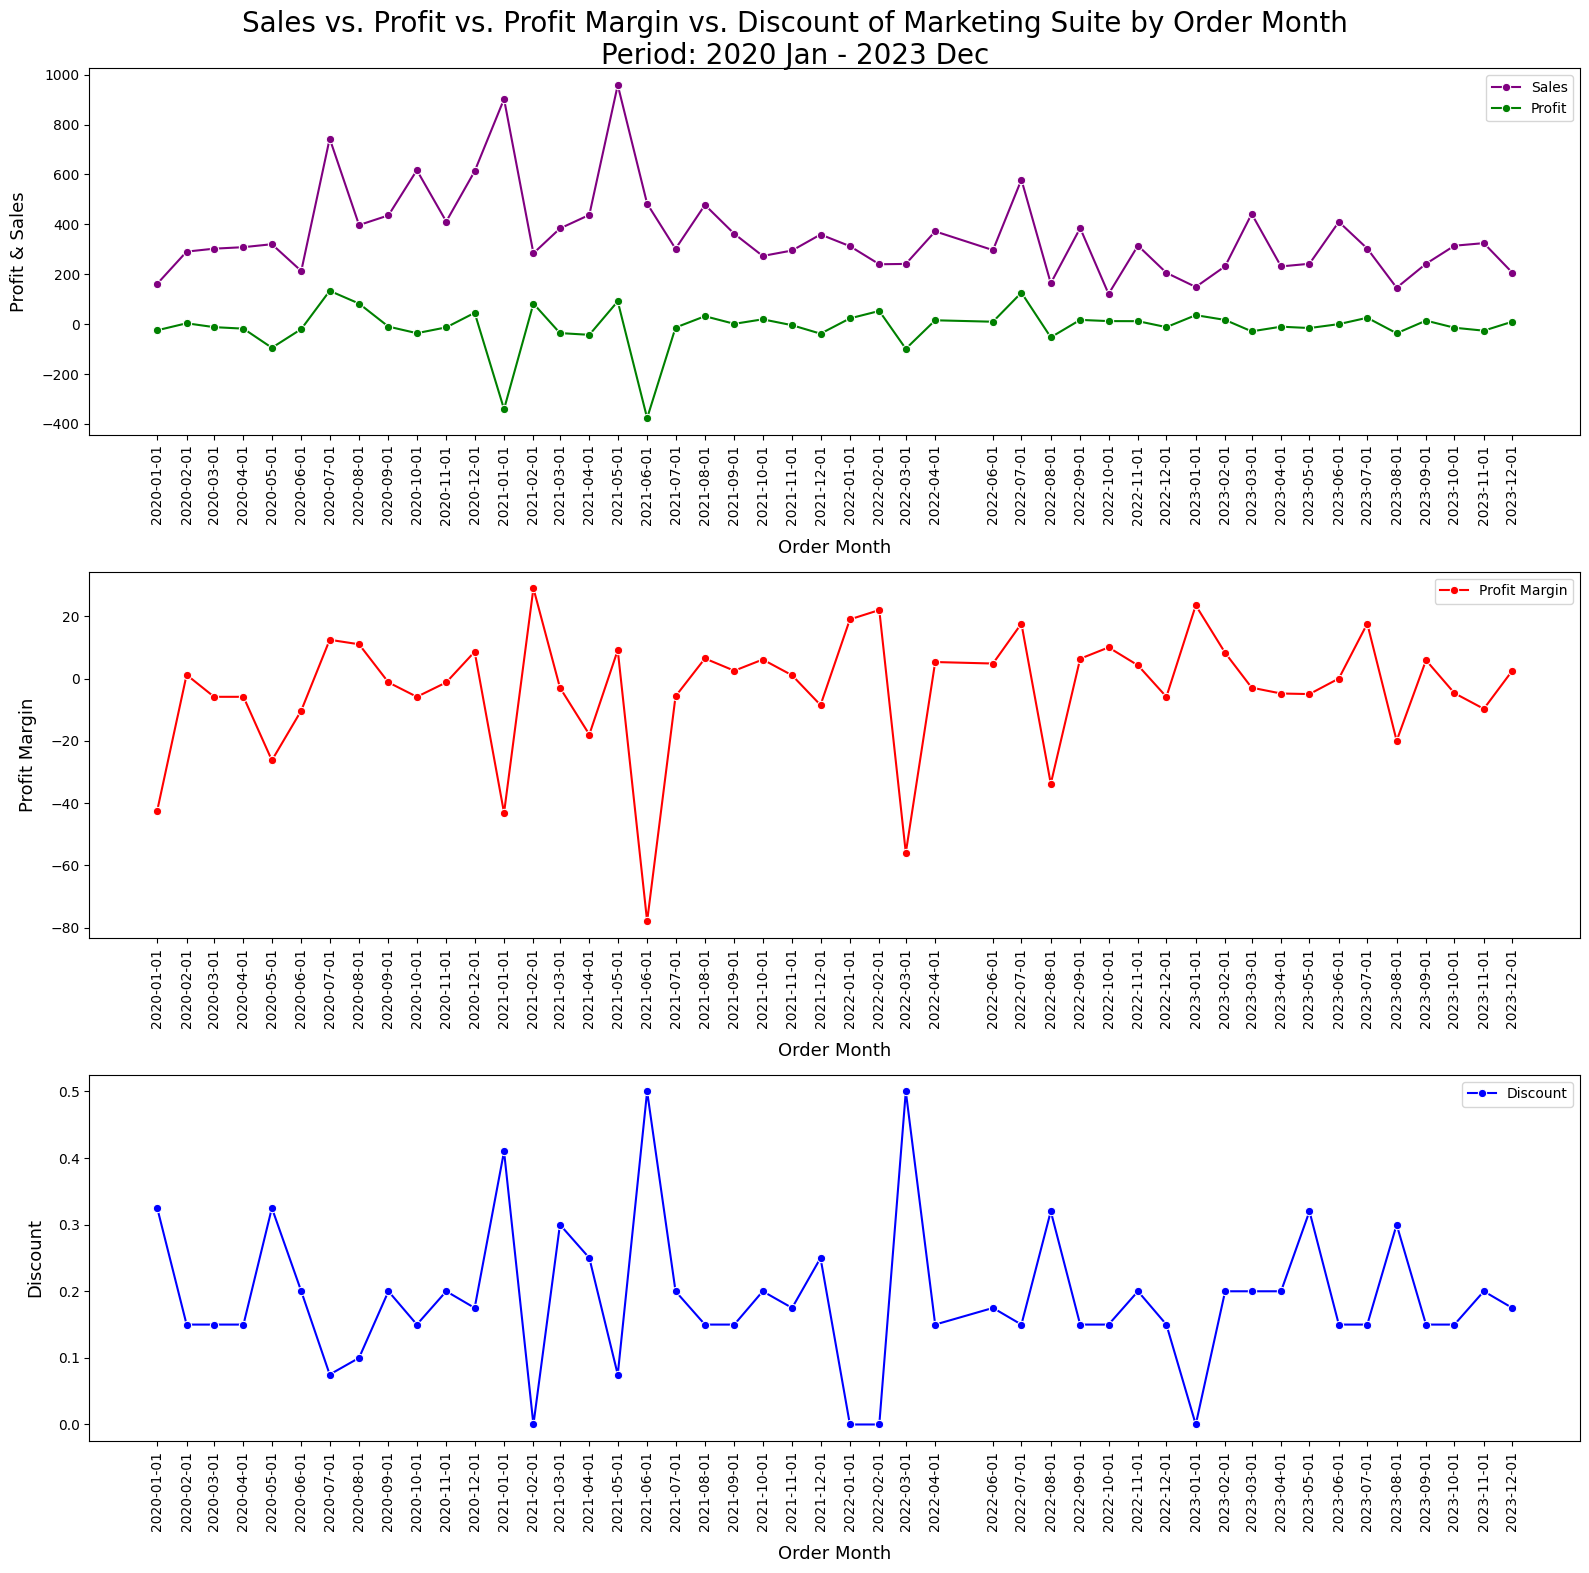

In [1802]:
plt.figure(figsize = (16, 16))

plt.subplot(3, 1, 1)
sns.lineplot(
    data = df_msuite_sales,
    x = "Order Month",
    y = "Sales",
    ci = 0,
    marker = "o",
    label = "Sales",
    color = "purple"
)
sns.lineplot(
    data = df_msuite_profit,
    x = "Order Month",
    y = "Profit",
    ci = 0,
    marker = "o",
    label = "Profit",
    color = "green"
)

plt.xlabel("Order Month", size = 13, labelpad = 10)
plt.ylabel("Profit & Sales", size = 13, labelpad = 10)
plt.xticks(ticks = df_msuite_sales["Order Month"], rotation = "vertical")

plt.subplot(3, 1, 2)
sns.lineplot(
    data = df_msuite_profit_margin,
    x = "Order Month",
    y = "Profit Margin",
    ci = 0,
    marker = "o",
    label = "Profit Margin",
    color = "red"
)

plt.xlabel("Order Month", size = 13, labelpad = 10)
plt.ylabel("Profit Margin", size = 13, labelpad = 10)
plt.xticks(ticks = df_msuite_sales["Order Month"], rotation = "vertical")

plt.subplot(3, 1, 3)
sns.lineplot(
    data = df_msuite_discount,
    x = "Order Month",
    y = "Discount",
    ci = 0,
    marker = "o",
    label = "Discount",
    color = "blue"
)

plt.xlabel("Order Month", size = 13, labelpad = 10)
plt.ylabel("Discount", size = 13, labelpad = 10)
plt.xticks(ticks = df_msuite_discount["Order Month"], rotation = "vertical")

plt.suptitle("Sales vs. Profit vs. Profit Margin vs. Discount of Marketing Suite by Order Month\nPeriod: 2020 Jan - 2023 Dec", size = 20)
plt.tight_layout()
plt.show()

Dari grafik di atas, kita bisa menjawab pertanyaan terkait kenaikan atau penuruan pada produk `Marketing Suite`, yang mana dapat kita simpulkan bahwa:
- Keempat tren di atas memiliki grafik yang cenderung fluktuatif diluar adanya kenaikan atau penurunan yang drastis.
- `Sales` mengalami kenaikan yang lumayan drastis pada bulan Juli di tahun 2020 dan 2022 serta bulan Januari dan Mei di tahun 2021.
- Sedangkan untuk `Profit` dan `Profit Margin` mengalami penuruan yang lumayan drastis pada bulan Januari dan Juni di tahun 2021 serta bulan Maret dan Agustus di tahun 2022.
- Tren `Profit` dan `Profit Margin` memiliki kesamaan yang cukup mirip di karenakan sama-sama menunjukkan keuntungan dari `Sales`, walaupun pada bulan Agustus di tahun 2023 memiliki perbedaan yang cukup signifikan di kedua data tersebut.
- `Discount` yang diberikan sangat berpengaruh terhadap `Sales`, `Profit`, dan juga `Profit Margin`.
- Ketika `Discount` naik, maka `Sales` pun akan naik, sementara itu `Profit` dan `Profit Margin` akan turun.
- Sebaliknya, ketika `Discount` turun, maka `Sales` pun akan turun, sementara itu `Profit` dan `Profit Margin` akan naik.
- Akan tetapi, pola dari `Discount` tidak melulu berdampak sama terhadap `Sales`, `Profit`, dan `Profit Margin`. Contohnya pada bulan Februari di tahun 2021, ketika `Discount` turun, `Sales` pun juga ikut turun, sementara `Profit` dan `Profit Margin` terlihat naik (Asumsi: Faktor eksternal seperti perubahan dalam strategi pemasaran, kompetisi, atau kondisi ekonomi).

### <font color = 'FF7200'>**3. Apakah diskon yang tinggi dapat mempengaruhi keuntungan?**</font>

Untuk menjawab pertanyaan nomor 2 dan 3, kita harus mencari tau korelasi antara variabel-variabel tersebut dengan melakukan *correlation test*. Kita telah mengetahui bahwa distribusi data pada kolom numerikal tidak terdistribusi normal, sehingga kita harus melakukan pengujian dengan metode yang sesuai, sehingga untuk pengujian ini kita harus menggunakan metode `Spearman` yang diperuntukan untuk pengujian distribusi tidak normal.

,Sales,Discount,Profit,Profit Margin
Sales,1.000000,-0.149500,0.233466,0.165776
Discount,-0.149500,1.000000,-0.831739,-0.892099
Profit,0.233466,-0.831739,1.000000,0.929936
Profit Margin,0.165776,-0.892099,0.929936,1.000000


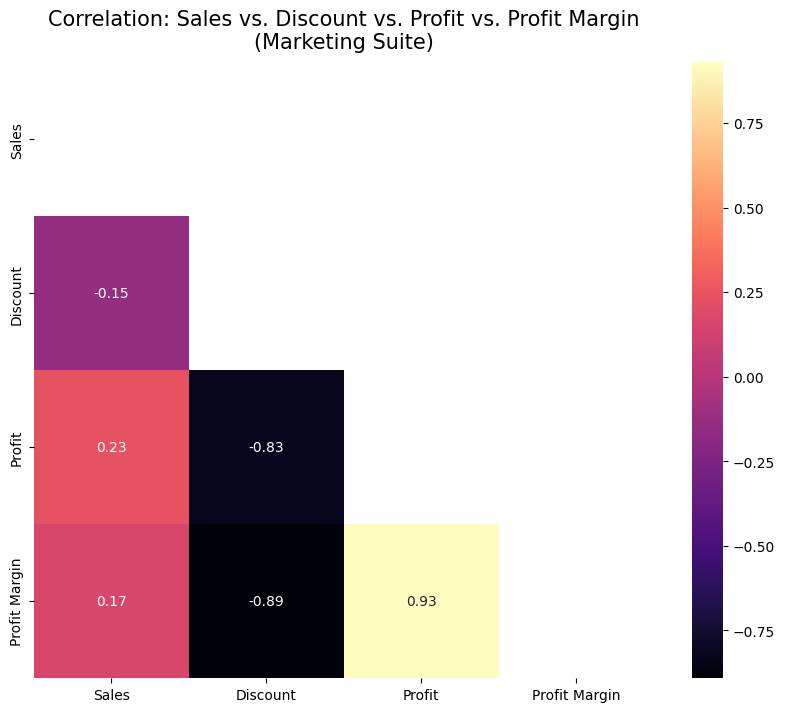

In [1803]:
correlation = df_msuite[numerical_col].corr(method = "spearman")
matriks = np.triu(correlation)
display(correlation)

plt.figure(figsize = (10, 8))
sns.heatmap(
    data = correlation,
    annot = True,
    fmt = ".2f",
    cmap = "magma",
    center = 0,
    mask = matriks
)

plt.title("Correlation: Sales vs. Discount vs. Profit vs. Profit Margin\n(Marketing Suite)", size = 15, pad = 10)
plt.show()

Dari grafik *heatmap* di atas, kita bisa mengetahui bahwa:
- `Profit` memiliki hubungan *positive-strong* terhadap `Profit Margin`. Artinya, semakin tinggi `Profit` yang didapat, maka akan semakin tinggi pula persentase `Profit Margin` yang diterima.
- `Sales` memiliki hubungan *positive-weak* terhadap `Profit` dan `Profit Margin`. Artinya, ketika `Sales` mengalami kenaikan, maka nilai serta persentase dari `Profit` dan `Profit Margin` pun juga akan naik.
- `Sales` memiliki hubungan *negative-weak* terhadap `Discount`. Artinya, ketika `Sales` mengalami penurunan, hal itu disebabkan karena adanya `Discount` yang naik.
- `Discount` memiliki hubungan *negative-strong* terhadap `Profit` dan `Profit Margin`. Artinya, ketika nilai `Discount` tinggi, maka `Profit` dan `Profit Margin` akan mengalami penurunan yang drastis.

### <font color = 'FF7200'>**4. Seberapa besar diskon yang diberikan untuk produk "Marketing Suite"?**</font>

Untuk mengetahui seberapa banyak persentase diskon yang diberikan pada produk `Marketing Suite`, kita harus membuat kolom baru untuk menandai transaksi mana yang menggunakan diskon dengan yang tidak menggunakan diskon. Di sini, kita menandai transaksi yang menggunakan diskon dengan label "With Discount", sedangkan yang tidak akan dilabeli dengan "Without Discount".

In [1804]:
df_msuite["Label"] = df_msuite["Discount"].apply(lambda x : "With Discount" if x > 0 else "Without Discount")
df_discount = df_msuite.groupby("Label")[["Label"]].count().rename(columns = {"Label" : "Total Transactions"}).reset_index()
df_discount["Percentage"] = round(df_discount["Total Transactions"] / df_discount["Total Transactions"].sum() * 100, 1)

display(df_msuite.groupby("Discount")[["Discount"]].count().rename(columns = {"Discount" : "Total Transactions"}).reset_index(), df_discount)

,Discount,Total Transactions
0,0.00,60
1,0.15,52
2,0.20,46
3,0.30,10
4,0.32,27
5,0.50,18
6,0.70,15


,Label,Total Transactions,Percentage
0,With Discount,168,73.7
1,Without Discount,60,26.3


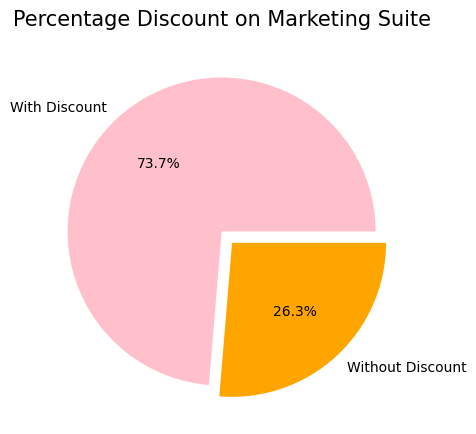

In [1805]:
plt.figure(figsize = (5, 5))
plt.pie(
    x = df_discount["Total Transactions"],
    labels = df_discount["Label"],
    autopct = f'%.1f%%',
    explode = [0, 0.1],
    colors = ["pink", "orange"]
)
plt.title("Percentage Discount on Marketing Suite", size = 15, pad = 10)
plt.show()

Ternyata memang benar, hampir 1/3 transaksi pada produk ini memiliki persentase jumlah diskon yang sangat besar jika dibandingkan dengan persentase transaksi yang tidak menggunakan diskon. Hal itu sangat wajar jika profit keseluruhan dari produk `Marketing Suite` ini mengalami kerugian yang besar jika dibandingkan dengan produk-produk lainnya.

In [1812]:
df_msuite[df_msuite["Label"] == "With Discount"].sort_values("Profit")

,Order Date,Customer,Quantity,Sales,Discount,Profit,Order Month,Profit Margin,Label
27,2021-09-17,Intel,7,3083.4300,0.50,-1665.0522,2021-09-01,-54.00,With Discount
1369,2021-12-24,Nissan Motor,7,590.0580,0.70,-786.7440,2021-12-01,-133.33,With Discount
5055,2021-01-03,Nissan Motor,9,1352.3976,0.32,-437.5404,2021-01-01,-32.35,With Discount
5784,2023-10-03,Cisco Systems,6,217.7640,0.70,-384.7164,2023-10-01,-176.67,With Discount
9092,2021-06-28,Banco Santander,6,482.9400,0.50,-376.6932,2021-06-01,-78.00,With Discount
...,...,...,...,...,...,...,...,...,...
9649,2022-11-27,Tyson Foods,8,3406.6640,0.15,160.3136,2022-11-01,4.71,With Discount
1545,2020-12-31,Wells Fargo,7,1573.4880,0.20,196.6860,2020-12-01,12.50,With Discount
2353,2021-08-31,Marathon Petroleum,7,1552.8310,0.15,200.9546,2021-08-01,12.94,With Discount
5651,2023-07-18,Nestle,5,1194.1650,0.15,210.7350,2023-07-01,17.65,With Discount


### <font color = 'FF7200'>**5. Apakah semua diskon yang diterapkan pada produk "Marketing Suite" menghasilkan kerugian?**</font>

In [1807]:
# df_msuite["Report"] = df_msuite["Profit"].apply(lambda x : "Profit" if x > 0 else "Loss")
# df_report = df_msuite.groupby("Report")[["Report"]].count().rename(columns = {"Report" : "Total Transactions"}).reset_index()
# df_report["Percentage"] = round(df_report["Total Transactions"] / df_report["Total Transactions"].sum() * 100, 1)
# df_report

In [1808]:
# df_msuite_profit = df_msuite[df_msuite["Report"] == "Loss"]
# df_msuite_profit

# <font color = 'A5FF90'>**Kesimpulan**</font>

# <font color = 'A5FF90'>**Rekomendasi**</font>

- Peninjauan kembali harga "Marketing Suite."
- Mengurangi atau menghentikan pemberian diskon yang berlebihan.
- Mengevaluasi biaya produksi produk "Marketing Suite."
- Membuat strategi pemasaran yang lebih efektif khusus untuk produk ini.